In [1]:
import pickle
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
#print(tf.version)
import bz2
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
import seaborn as sns
import itertools
warnings.filterwarnings('ignore')

In [2]:
import os
import os.path
from glob import glob
import random
import shutil
from tqdm.auto import tqdm
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorboard.plugins.hparams import api as hp
from sklearn.model_selection import train_test_split
#from kerashypetune import KerasGridSearch

In [3]:
def FIPS_function(row):
    state = str(row['stateFip']).zfill(2)
    county = str(row['countyFip']).zfill(3)
    return str(state + county)

### --- Note ---
- Original load, but I used different dfs throughout on different parts.
- Wanted to make sure I was doing it correctly before I ran on the whole

In [4]:
bz_file = bz2.BZ2File("feeFiFoFum.pbz2",'rb')
df = pd.read_pickle(bz_file)
df.head()

,dates,JHU_ConfirmedCases.data,NYT_ConfirmedCases.data,JHU_ConfirmedDeaths.data,NYT_ConfirmedDeaths.data,NYT_ConfirmedDeaths.missing,TotalPopulation.data,MaleAndFemale_AtLeast65_Population.data,Male_Total_Population.data,Female_Total_Population.data,...,healthInsNativeWith,healthInsForeignNatWith,healthInsForeignNoncitWith,healthInsForeignNatNo,healthInsForeignNoncitNo,healthInsNativeNo,countyStateName,stateFip,countyFip,pm25
0,2020-03-19,1.0,1.0,0.0,0.0,0,24527.0,5343.0,11868.0,12673.0,...,21415,179,87,39,122,2555,"Abbeville County, South Carolina",45,001,9.618551
1,2020-03-20,1.0,1.0,0.0,0.0,0,24527.0,5343.0,11868.0,12673.0,...,21415,179,87,39,122,2555,"Abbeville County, South Carolina",45,001,9.618551
2,2020-03-21,1.0,1.0,0.0,0.0,0,24527.0,5343.0,11868.0,12673.0,...,21415,179,87,39,122,2555,"Abbeville County, South Carolina",45,001,9.618551
3,2020-03-22,1.0,1.0,0.0,0.0,0,24527.0,5343.0,11868.0,12673.0,...,21415,179,87,39,122,2555,"Abbeville County, South Carolina",45,001,9.618551
4,2020-03-23,1.0,1.0,0.0,0.0,0,24527.0,5343.0,11868.0,12673.0,...,21415,179,87,39,122,2555,"Abbeville County, South Carolina",45,001,9.618551


In [5]:
### Drop non-numeric and unnecessary columns
cols = ['NYT_ConfirmedCases.data','NYT_ConfirmedDeaths.data','NYT_ConfirmedDeaths.missing','county','LND110210','countyStateName','stateFip','countyFip']
df.drop(cols, axis=1, inplace=True)

## --------- Update EDA ----------

- I can do some plots, and then suggestions for other EDA i could include???
- I think I can run it on the entire dataset, it just takes a while and wanted to make sure it   was right before I did it

In [6]:
print(df.shape); print(1879589/10000)

(1879589, 88)
187.9589


In [8]:
##function for above and below a threshold

def get_above_threshold(dff,thresh):
    corr_mtrx = dff.corr()
    corr_vals = corr_mtrx.values
    flds = list(corr_mtrx.columns)
    numCols = corr_mtrx.shape[0]
    above_threshold = []
    
    for i in range(numCols):
        for j in range(i+1, numCols):
            if corr_vals[i,j] > thresh:
                if i != j:
                    above_threshold.append([flds[i],flds[j],corr_vals[i,j]])
    above_threshold.sort(reverse=True)
    return above_threshold

def get_below_threshold(dff,thresh):
    corr_mtrx = dff.corr()
    corr_vals = corr_mtrx.values
    flds = list(corr_mtrx.columns)
    numCols = corr_mtrx.shape[0]
    above_threshold = []
    
    for i in range(numCols):
        for j in range(i+1, numCols):
            if corr_vals[i,j] < thresh:
                if i != j:
                    above_threshold.append([flds[i],flds[j],corr_vals[i,j]])
    above_threshold.sort(reverse=True)
    return above_threshold

In [11]:
## raw correlations
df_raw_corrs = get_above_threshold(df,0.9)
df_raw_corrs[0:10]

[['unitsInStructure', 'healthInsTotal', 0.994129629869046],
 ['unitsInStructure', 'healthInsNativeWith', 0.9949704848079665],
 ['totalTrans', 'unitsInStructure', 0.9929803019216017],
 ['totalTrans', 'householdsTotal', 0.9963845175005094],
 ['totalTrans', 'householdStructuresTotal', 0.9963845175005094],
 ['totalTrans', 'houseWith65', 0.9808301889300902],
 ['totalTrans', 'houseNonfamNo65', 0.9649106176366248],
 ['totalTrans', 'houseNonfam65', 0.9476931509873331],
 ['totalTrans', 'houseNo65', 0.9961388201760542],
 ['totalTrans', 'houseFamilyNo65', 0.9969163007655882]]

In [12]:
### pca here or after conversions?

#pca = PCA(n_components=2)
#principalComponents = pca.fit_transform(x_p)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1','pc2'])

# ------------- Clean up -----------
- Followed Noah's notebook
- back to original dataset for clean up

In [13]:
### Temporarily, replace FIPS codes with latitude and longitude of the centroid of each county
counties = pd.read_csv('2021_Gaz_counties_national.txt', delimiter='\t')
counties.rename(columns={'INTPTLONG                                                                                                               ': 'longitude',
                        'INTPTLAT': 'latitude'}, inplace=True)

counties = counties[['GEOID', 'latitude', 'longitude' ]]
df.fips = df.fips.astype('int64')

df = df.merge(counties, how='left', left_on='fips', right_on='GEOID')
df.drop(['GEOID'], axis=1, inplace=True)

### Replace dates with monotonically increasing integers starting with the minimum date
df.dates = pd.to_datetime(df.dates, format='%Y-%m-%d')
min_date = min(df.dates)
max_date = max(df.dates)
print(min_date, max_date, df.dates.dtype)
df['day'] =(df.dates - min_date).dt.days
df.drop(['dates'], axis=1, inplace=True)

###Replace the integer representation of date with sin and cosine encoding

cyclical_interval = 365
continuous_interval = 3650
df['cyclical_sin'] = np.sin((df.day * 2 * np.pi)/cyclical_interval)
df['cyclical_cos'] = np.cos((df.day * 2 * np.pi)/cyclical_interval)
df['continuous_sin'] = np.sin((df.day * 2 * np.pi)/continuous_interval)
df['continuous_cos'] = np.cos((df.day * 2 * np.pi)/continuous_interval)
df.drop('day', axis=1, inplace=True)

2020-03-11 00:00:00 2022-01-16 00:00:00 datetime64[ns]


In [14]:
###Get the feature column for latitude and longitude
# crossed_latlong = pp.get_latlong_fc(df)

lat_buckets = list(np.linspace(df.latitude.min(), df.latitude.max(),100))
long_buckets = list(np.linspace(df.longitude.min(), df.longitude.max(),100))

#make feature columns
lat_fc = tf.feature_column.bucketized_column(tf.feature_column.numeric_column('latitude'),lat_buckets)
long_fc= tf.feature_column.bucketized_column(tf.feature_column.numeric_column('longitude'),long_buckets)
    
# crossed columns tell the model how the features relate
crossed_latlong = tf.feature_column.crossed_column(keys=[lat_fc, long_fc], hash_bucket_size=1000) # No precise rule, maybe 1000 buckets will be good?
    
embedded_latlong = tf.feature_column.embedding_column(crossed_latlong,9)

feature_layer = tf.keras.layers.DenseFeatures(embedded_latlong)

df[['geo0', 'geo1', 'geo2','geo3', 'geo4','geo5','geo6','geo7','geo8']] = feature_layer({'latitude': df.latitude, 'longitude': df.longitude})

# df.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [15]:
### normalize the data
cols_to_normalize = [
       'TotalPopulation.data', 'MaleAndFemale_AtLeast65_Population.data',
       'Male_Total_Population.data', 'Female_Total_Population.data',
       'MaleAndFemale_Under18_Population.data', 'BLS_EmployedPopulation.data',
       'BLS_EmployedPopulation.missing', 'BLS_UnemployedPopulation.data',
       'BLS_UnemployedPopulation.missing', 'BLS_UnemploymentRate.data',
       'BLS_UnemploymentRate.missing', 'BLS_LaborForcePopulation.data',
       'BLS_LaborForcePopulation.missing', 'AverageDailyTemperature.data',
       'AverageDailyTemperature.missing', 'AverageDewPoint.data',
       'AverageDewPoint.missing', 'AverageRelativeHumidity.data',
       'AverageRelativeHumidity.missing', 'AverageSurfaceAirPressure.data',
       'AverageSurfaceAirPressure.missing', 'AveragePrecipitationTotal.data',
       'AveragePrecipitationTotal.missing', 'AveragePrecipitation.data',
       'AveragePrecipitation.missing', 'AverageWindDirection.data',
       'AverageWindDirection.missing', 'AverageWindSpeed.data',
       'AverageWindSpeed.missing', 'hospitalIcuBeds', 'hospitalStaffedBeds',
       'hospitalLicensedBeds', 'latestTotalPopulation', 'jhu_daily_death',
       'jhu_daily_cases', 'jhu_daily_new_cases', 
    'jhu_daily_death_rolling_7',
       'jhu_daily_cases_rolling_7', 'jhu_daily_new_cases_rolling_7',
       'jhu_daily_death_rolling_30', 'jhu_daily_cases_rolling_30',
       'jhu_daily_new_cases_rolling_30', 'jhu_death_rate', 'jhu_case_rate',
       'jhu_new_case_rate', 'density', 'icu_beds_per_person',
       'staffed_beds_per_person', 'licensed_beds_per_person', 'cold_days',
       'hot_days', 'moderate_days', 'gte_65_percent', 'lt_18_percent',
       'employed_percent', 'unemployed_percent', 'totalMoved',
       'movedWithinState', 'movedWithoutState', 'movedFromAbroad',
       'publicTrans', 'totalTrans', 'householdsTotal', 'houseWith65',
       'house2+with65', 'houseFamily65', 'houseNonfam65', 'houseNo65',
       'house2+No65', 'houseFamilyNo65', 'houseNonfamNo65',
       'householdStructuresTotal', 'householdIncomeMedian', 'gini',
       'hoursWorkedMean', 'unitsInStructure', 'healthInsTotal',
       'healthInsNativeWith', 'healthInsForeignNatWith',
       'healthInsForeignNoncitWith', 'healthInsForeignNatNo',
       'healthInsForeignNoncitNo', 'healthInsNativeNo', 'pm25', 'latitude',
       'longitude']
cols_raw = ['fips','JHU_ConfirmedCases.data', 'JHU_ConfirmedDeaths.data', 'cyclical_sin', 'cyclical_cos', 'continuous_sin',
       'continuous_cos', 'geo0', 'geo1', 'geo2','geo3', 'geo4','geo5','geo6','geo7','geo8']
df_normalized = df[cols_to_normalize]
df_normalized = (df_normalized - df_normalized.mean())/df_normalized.std()
df_raw = df[cols_raw]
df = pd.concat([df_raw, df_normalized], axis=1)

In [16]:
print(df.shape); df.head(2)

(1879589, 102)


,fips,JHU_ConfirmedCases.data,JHU_ConfirmedDeaths.data,cyclical_sin,cyclical_cos,continuous_sin,continuous_cos,geo0,geo1,geo2,...,healthInsTotal,healthInsNativeWith,healthInsForeignNatWith,healthInsForeignNoncitWith,healthInsForeignNatNo,healthInsForeignNoncitNo,healthInsNativeNo,pm25,latitude,longitude
0,45001,1.0,0.0,0.137279,0.990532,0.013771,0.999905,-0.498501,-0.251281,-0.247479,...,-0.235997,-0.262976,-0.137842,-0.148042,-0.143646,-0.141956,-0.196056,0.811931,-0.830256,0.80029
1,45001,1.0,0.0,0.154309,0.988023,0.015492,0.999880,-0.498501,-0.251281,-0.247479,...,-0.235997,-0.262976,-0.137842,-0.148042,-0.143646,-0.141956,-0.196056,0.811931,-0.830256,0.80029


# ----------- PCA -------------
- need to run on the entirety of it 
- df_pca is used throughout the pca portion

In [18]:
###https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

#df_pca = df.copy() # if ran on the whole, it returns:
 # ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
    
df_pca = df.head(939794) #half
print(df_pca.shape)

### PCA
target = 'JHU_ConfirmedCases.data'
features = list(df_pca.columns); features.remove(target)
feature_columns = [tf.feature_column.numeric_column(i) for i in features]

x_p = df_pca.loc[:, features].values
x_p = StandardScaler().fit_transform(x_p)
y_p = df_pca.loc[:,[target]].values

pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(x_p)
principalDf = pd.DataFrame(data = principalComponents)

finalDf = pd.concat([principalDf, df_pca[[target]]], axis = 1)
finalDf.head(3)

(939794, 102)


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,JHU_ConfirmedCases.data
0,-1.637546,-1.086570,-1.440490,-0.561701,0.391720,0.469667,0.184885,-0.430037,-0.559564,-0.694865,...,-0.335857,0.634479,-0.581485,0.573892,0.688801,1.665649,-0.234720,0.251902,-1.039646,1.0
1,-1.633521,-0.987914,-1.336293,-0.546283,0.108412,0.468769,0.290508,-0.264901,0.024304,-0.611459,...,-0.280389,0.702984,-0.542972,0.532966,1.036604,1.462686,-0.064745,0.048126,-1.017207,1.0
2,-1.633685,-0.900594,-1.240487,-0.497753,0.028033,0.536756,0.298739,-0.252963,-0.036083,-0.621779,...,-0.282065,0.720376,-0.471888,0.538906,1.125364,1.397206,-0.028992,-0.123360,-0.823523,1.0


In [19]:
var_expln = list(pca.explained_variance_ratio_)
var_expln.sort(reverse=True)
var_expln[0:5]

[0.36085273093031794,
 0.06142775630887217,
 0.051809347092052795,
 0.04359529093301914,
 0.03522765664188035]

Text(0, 0.5, 'pc-2')

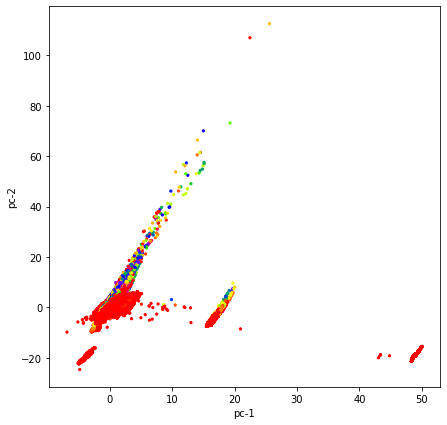

In [20]:
plt.figure(figsize=(7,7))
plt.scatter(finalDf[1],finalDf[2],c=finalDf['JHU_ConfirmedCases.data'],cmap='prism', s =5)
plt.xlabel('pc-1')
plt.ylabel('pc-2')

### another look at correlation
- used pca_df since it was smaller til i make sure it's right

In [21]:
## correlations

df_corrs = get_above_threshold(df,0.9)
df_corrs[0:10]

[['unitsInStructure', 'healthInsTotal', 0.9941296298690643],
 ['unitsInStructure', 'healthInsNativeWith', 0.9949704848081234],
 ['totalTrans', 'unitsInStructure', 0.9929803019216314],
 ['totalTrans', 'householdsTotal', 0.9963845175006059],
 ['totalTrans', 'householdStructuresTotal', 0.9963845175006059],
 ['totalTrans', 'houseWith65', 0.9808301889300108],
 ['totalTrans', 'houseNonfamNo65', 0.9649106176366371],
 ['totalTrans', 'houseNonfam65', 0.9476931509873973],
 ['totalTrans', 'houseNo65', 0.9961388201760928],
 ['totalTrans', 'houseFamilyNo65', 0.9969163007657244]]

#### extra not needed, article just continued with this stuff

# ------- linear regression / baseline ------
- need to run on whole dataset and separate 1 day every 30 for x/y

## took a different approach to building the datasets, but lmk if it's off
- https://www.guru99.com/linear-regression-tensorflow.html

### works, but need to come back and get right x/y 
- need to sort x and y to 30 days to predict 1. Need to run on the entire dataset.

In [27]:
## function to automate that day split

def days_to_predict(dff,numDays):
    train = pd.DataFrame(); test = pd.DataFrame()
    numDays = numDays+1

    for i in range(len(dff)):
        if i%numDays == 0:
            test = test.append(dff.loc[[i]], ignore_index = True)
        else:
            train = train.append(dff.loc[[i]], ignore_index = True)
    return train,test

In [ ]:
# took forever ^^

In [ ]:
## hopefully faster

def days_to_predict2(dff,numDays):
    index_len = dff.shape[0]; numDays = numDays+1
    
    train = dff.copy()
    test = train[0:index_len:numDays]
    for i in range(index_len):
        if i%numDays != 0:
            train.drop(index=[i])
    
    return train,test

In [ ]:
train_df, test_df = days_to_predict2(df,30)

In [ ]:
train_df.head(3)

In [ ]:
test_df.head(3)

In [ ]:
def input_fn(dataset, batch_size=128, num_epochs=None, shuffle=True):
    return tf.compat.v1.estimator.inputs.pandas_input_fn(
    x = dataset[features],
    y = dataset[target],
    batch_size=batch_size,
    num_epochs=num_epochs,
    shuffle=shuffle )

In [ ]:
## https://www.h2kinfosys.com/blog/linear-regression-using-tensorflow-with-examples/
target = 'JHU_ConfirmedCases.data'
features = list(df.columns); features.remove(target)
feature_columns = [tf.feature_column.numeric_column(i) for i in features]

estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns, model_dir='LinRegTrain')

In [ ]:
#train the model with 2000 steps
estimator.train(input_fn=input_fn(train_df, num_epochs=None), steps=2000)

In [ ]:
#evaluate the model
ev = estimator.evaluate(input_fn=input_fn(test_df, num_epochs=10, shuffle=True))

In [ ]:
train_df[target].describe()

In [ ]:
loss_score = ev["loss"]
print("Loss: {0:f}".format(loss_score))

In [ ]:
### is this suppuse to go where it is in the line below??
test_df.shape[1]

In [ ]:
y_pred_df = estimator.predict(input_fn=input_fn(test_df,num_epochs=None))
predictions = list(p["predictions"] for p in itertools.islice(y_pred_df, test_df.shape[0]))
#print("Predictions: {}".format(str(predictions)))

In [ ]:
ypred_df = [x[0] for x in predictions]
ypred_df[0:5]

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(test_df4[target], ypred_df4)
print(MAE)

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(ypred_df,test_df[target],s =5, cmap='prism')
plt.xlabel('y')
plt.ylabel('ypred')

In [ ]:
print('done')